In [1]:
# Tugas Kecil 2 IF4071 Pembelajaran Mesin
# Eksplorasi scikit-learn pada Jupyter Notebook
# Anggota Kelompok :
# Ikhwanul Muslimin 13514020
# Amal Qurany 13514078
# I Dewa Putu D. K. A. 13514096

from __future__ import print_function
import pandas as pd
from sklearn import datasets 
from sklearn.neural_network import MLPClassifier
from sklearn import tree
import graphviz

#2a Load tennis.csv then print
print ("Dataset Tennis")
print (pd.read_csv("tennis.csv"))

#2a Load-iris
df = datasets.load_iris()
features = df.feature_names

Dataset Tennis
     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no


In [2]:
#-----------IRIS--------------
#-----------2B----------------
#Full-Training
X = df.data
Y = df.target

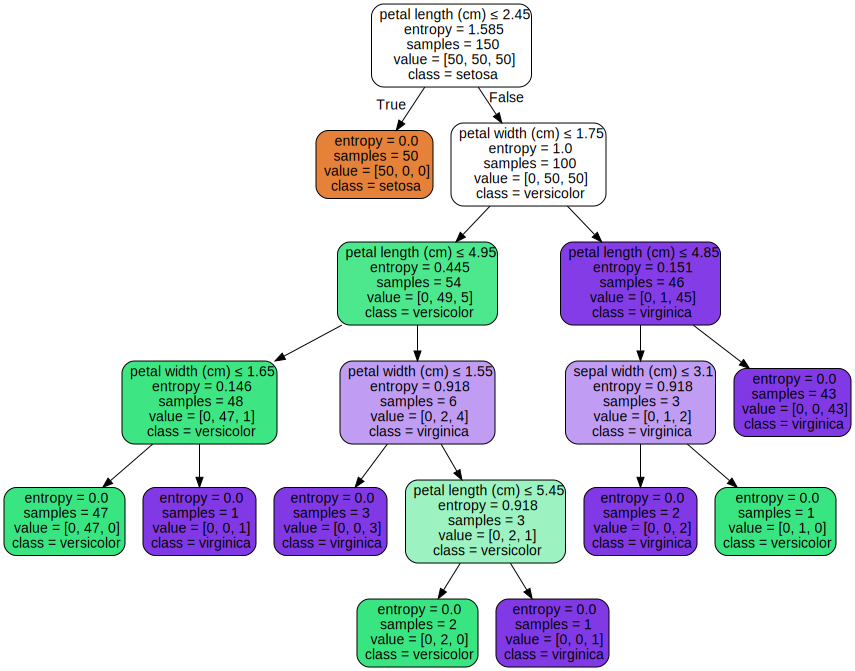

In [3]:
#Decision Tree
clfDT = tree.DecisionTreeClassifier(criterion="entropy")
clfDT = clfDT.fit(X,Y)

#Gambar model
dot_data = tree.export_graphviz(clfDT, out_file=None, 
                         feature_names=df.feature_names,  
                         class_names=df.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph
#graph.render("iris") #save to pdf

In [4]:
#ANN
clfANN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clfANN = clfANN.fit(X, Y)
clfANN.coefs_

[array([[-0.13550239,  0.3597881 , -0.81630916, -0.3227893 , -0.57684476],
        [-0.66570776, -0.51233452, -0.25219808, -0.16857787,  0.06338741],
        [-0.1319547 ,  0.30246194, -0.48262707,  0.6174627 , -0.77177221],
        [ 0.27837206, -0.13504058,  0.09584001, -0.5872452 , -0.49299781]]),
 array([[ 0.73066898, -0.76834821],
        [-0.85350401, -0.61135478],
        [ 0.7001833 , -0.74371656],
        [-0.14608018,  0.84784599],
        [ 0.06141013,  0.35528709]]),
 array([[ 0.73312753, -1.05537667,  0.5480383 ],
        [ 1.07104013,  0.54370328, -0.48102273]])]

In [16]:
#------------2C-----------
#Bagi jadi 2 data (split 90%, 10%)
import numpy as np
from sklearn import cross_validation
partTest = 0.1
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(
    X, Y, test_size=partTest, random_state=0)
print ("Banyaknya train data: "+str(len(X_train)))
print ("Banyaknya validasi data: "+str(len(X_test)))

Banyaknya train data: 135
Banyaknya validasi data: 15


In [6]:
from sklearn import metrics
#Decision Tree
#Bangun model
clfSplitDT = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfSplitDT.fit(X_train, Y_train)

#Hitung YPrediksi
Y_pred = clfSplitDT.predict(X_test)

#Hitung akurasi
akurasiSplitDT = metrics.accuracy_score(Y_test,Y_pred)*100
print ("Akurasi "+str(akurasiSplitDT)+"%")

#Confussion Matriks
cnf_matrix_SplitDT = metrics.confusion_matrix(Y_test, Y_pred)
print ("Confussion Matrix")
print (cnf_matrix_SplitDT)

Akurasi 100.0%
Confussion Matrix
[[3 0 0]
 [0 8 0]
 [0 0 4]]


In [7]:
#ANN
clfSplitANN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,11), random_state=1) #11 hidden layer@5 units
clfSplitANN = clfSplitANN.fit(X_train, Y_train)

#Hitung YPrediksi
Y_pred = clfSplitANN.predict(X_test)

#Hitung akurasi
akurasiSplitANN = metrics.accuracy_score(Y_test,Y_pred)*100
print ("Akurasi "+str(akurasiSplitANN)+"%")

#Confussion Matriks
cnf_matrix_SplitANN = metrics.confusion_matrix(Y_test, Y_pred)
#print ("Confussion Matrix")
print (cnf_matrix_SplitANN)

Akurasi 100.0%
[[3 0 0]
 [0 8 0]
 [0 0 4]]


In [8]:
# 2d
# 10-Fold Cross Validation using full data training model

from sklearn.model_selection import cross_val_score

## decision tree
score = cross_val_score(clfDT, X, Y, cv=10)
print ("10-Fold CV, trainig using all data with Decision Tree")
print ("Score:" + str(score))
print ()

# ANN
score = cross_val_score(clfANN, X, Y, cv=10)
print ("10-Fold CV, trainig using all data with ANN")
print("Score:" + str(score))

10-Fold CV, trainig using all data with Decision Tree
Score:[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  1.          1.          1.        ]

10-Fold CV, trainig using all data with ANN
Score:[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333]


In [9]:
# 10-Fold Cross Validation using partial data training

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(X)
print (kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [10]:
## with decision tree

clfDTFold = tree.DecisionTreeClassifier(criterion="entropy")

i = 1
for train_index, test_index in kf.split(X):
    #print ("TRAIN: ", train_index, "TEST: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    clfDTFold = clfDTFold.fit(X_train, Y_train)

    #Hitung YPrediksi
    Y_pred = clfDTFold.predict(X_test)

    #Hitung akurasi
    akurasiFoldDT = metrics.accuracy_score(Y_test,Y_pred)*100
    print ("Fold-" + str(i) + ", akurasi "+str(akurasiFoldDT)+"%")
    i+=1

Fold-1, akurasi 100.0%
Fold-2, akurasi 100.0%
Fold-3, akurasi 100.0%
Fold-4, akurasi 93.3333333333%
Fold-5, akurasi 93.3333333333%
Fold-6, akurasi 86.6666666667%
Fold-7, akurasi 100.0%
Fold-8, akurasi 86.6666666667%
Fold-9, akurasi 80.0%
Fold-10, akurasi 100.0%


In [11]:
# with ANN

clfANNFold = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

i = 1
for train_index, test_index in kf.split(X):
    #print ("TRAIN: ", train_index, "TEST: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    clfANNFold = clfANNFold.fit(X_train, Y_train)

    #Hitung YPrediksi
    Y_pred = clfANNFold.predict(X_test)

    #Hitung akurasi
    akurasiFoldDT = metrics.accuracy_score(Y_test,Y_pred)*100
    print ("Fold-" + str(i) + ", akurasi "+str(akurasiFoldDT)+"%")
    i+=1

Fold-1, akurasi 0.0%
Fold-2, akurasi 0.0%
Fold-3, akurasi 0.0%
Fold-4, akurasi 0.0%
Fold-5, akurasi 0.0%
Fold-6, akurasi 0.0%
Fold-7, akurasi 0.0%
Fold-8, akurasi 0.0%
Fold-9, akurasi 0.0%
Fold-10, akurasi 0.0%


In [12]:
# 2e
# Saving Model

from sklearn.externals import joblib

joblib.dump(clfDT, 'Iris-DT.model')
joblib.dump(clfANN, 'Iris-ANN.model')

['Iris-ANN.model']

In [13]:
# 2f
# Load Saved Model

loadedDTModel = joblib.load('Iris-DT.model')

score = cross_val_score(loadedDTModel, X, Y, cv=10)
print ("Score:" + str(score))


Score:[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  1.          1.          1.        ]


In [14]:
# 2g
# Create New  Instance

anon_iris_x = [3.1, 1.2, 0.7, 4.0]
anon_iris_x = np.array([anon_iris_x])

print ("New instance attribute: " + str(anon_iris_x))

# 2h
# Classify New Instance
print ("Classification using Decision Tree: ")
print (clfDT.predict(anon_iris_x))

print ()
iris_70_copy = [5.9, 3.2, 4.8, 1.8]
iris_70_copy = np.array([iris_70_copy])

print ("Classification using ANN")
print (clfANN.predict(iris_70_copy))
print (clfANN.predict([X[70]]))

New instance attribute: [[ 3.1  1.2  0.7  4. ]]
Classification using Decision Tree: 
[0]

Classification using ANN
[2]
[2]


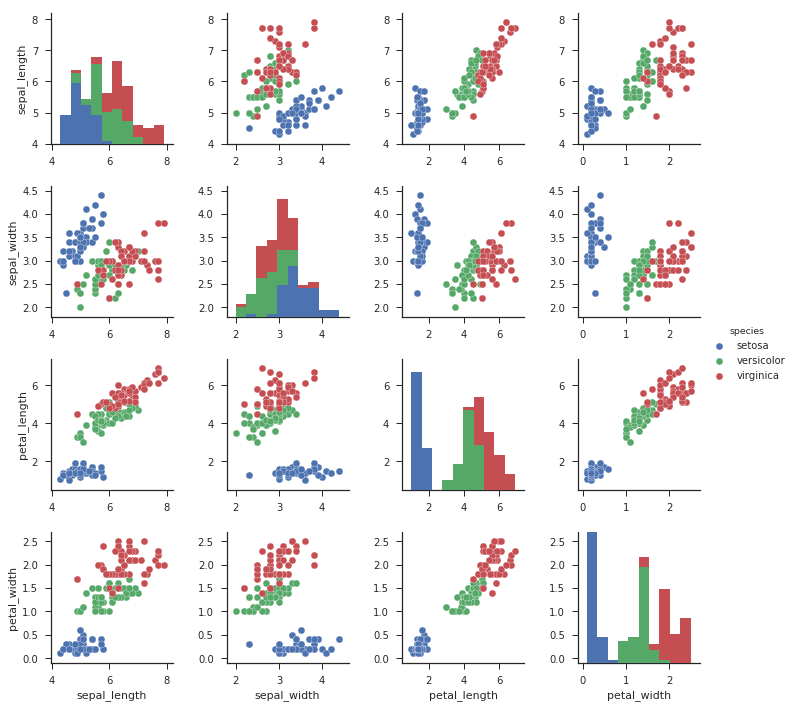

In [15]:
# 2i
# Feature Analysis

%matplotlib inline
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

data = sns.load_dataset("iris")

sns.pairplot(data, hue="species")

plt.show()